In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [2]:
#Reading the data
url = "https://raw.githubusercontent.com/angryolli/ML_Project/refs/heads/main/NBA%20Player%20Stats%20and%20Salaries_2010-2025.csv"
df = pd.read_csv(url, sep=',', on_bad_lines='skip')
df.head(1)

,Player,Salary,Year,Pos,Age,Team,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Kobe Bryant,23034375,2010,SG,31,LAL,73,73,38.8,9.8,...,0.811,1.1,4.3,5.4,5.0,1.5,0.3,3.2,2.6,27.0


In [3]:
#Filtering for the last three season
#Couple of nan are in the dataset
df = df.query("Year >= 2023")

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1449 entries, 5849 to 7297
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1449 non-null   str    
 1   Salary  1449 non-null   int64  
 2   Year    1449 non-null   int64  
 3   Pos     1449 non-null   str    
 4   Age     1449 non-null   int64  
 5   Team    1449 non-null   str    
 6   G       1449 non-null   int64  
 7   GS      1449 non-null   int64  
 8   MP      1449 non-null   float64
 9   FG      1449 non-null   float64
 10  FGA     1449 non-null   float64
 11  FG%     1447 non-null   float64
 12  3P      1449 non-null   float64
 13  3PA     1449 non-null   float64
 14  3P%     1429 non-null   float64
 15  2P      1449 non-null   float64
 16  2PA     1449 non-null   float64
 17  2P%     1445 non-null   float64
 18  eFG%    1447 non-null   float64
 19  FT      1449 non-null   float64
 20  FTA     1449 non-null   float64
 21  FT%     1440 non-null   float64
 22  ORB     

In [5]:
#columns including nan values
#delete players without throws
arr = ["FG%", "3P%", "2P%", "eFG%", "FT%"]
for a in arr:
    print("Null values " + a)
    print(df.loc[(df[a].isna()), ["Player", "FG", "FGA", "2P", "2PA", "3P", "3PA", "FT", "FTA"]])
    df[[a]] = df[[a]].fillna(0)
df = df.drop([7267, 7275], axis=0)

Null values FG%
               Player   FG  FGA   2P  2PA   3P  3PA   FT  FTA
7267  Jalen McDaniels  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7275    Jahlil Okafor  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Null values 3P%
                 Player   FG   FGA   2P   2PA   3P  3PA   FT  FTA
6824        Rudy Gobert  4.7   7.1  4.7   7.1  0.0  0.0  2.6  3.8
6920  Mitchell Robinson  2.2   3.3  2.2   3.3  0.0  0.0  0.8  1.1
6925     Daniel Gafford  5.0   7.1  5.0   7.1  0.0  0.0  2.4  3.4
6948        Ivica Zubac  7.4  11.8  7.4  11.8  0.0  0.0  2.0  3.0
7048   Dereck Lively II  3.7   5.3  3.7   5.3  0.0  0.0  1.3  2.0
7059        Jalen Duren  4.8   7.0  4.8   7.0  0.0  0.0  2.1  3.1
7063     Isaiah Jackson  2.8   4.6  2.8   4.6  0.0  0.0  1.4  2.8
7150       Jericho Sims  0.8   1.3  0.8   1.3  0.0  0.0  0.2  0.2
7155     Charles Bassey  1.9   3.3  1.9   3.3  0.0  0.0  0.6  0.9
7177     DeAndre Jordan  1.6   2.5  1.6   2.5  0.0  0.0  0.5  1.1
7230     Bruno Fernando  1.5   2.9  1.5   2.9  0.0  0.0 

In [6]:
#0 nan values
df.info()

<class 'pandas.DataFrame'>
Index: 1447 entries, 5849 to 7297
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1447 non-null   str    
 1   Salary  1447 non-null   int64  
 2   Year    1447 non-null   int64  
 3   Pos     1447 non-null   str    
 4   Age     1447 non-null   int64  
 5   Team    1447 non-null   str    
 6   G       1447 non-null   int64  
 7   GS      1447 non-null   int64  
 8   MP      1447 non-null   float64
 9   FG      1447 non-null   float64
 10  FGA     1447 non-null   float64
 11  FG%     1447 non-null   float64
 12  3P      1447 non-null   float64
 13  3PA     1447 non-null   float64
 14  3P%     1447 non-null   float64
 15  2P      1447 non-null   float64
 16  2PA     1447 non-null   float64
 17  2P%     1447 non-null   float64
 18  eFG%    1447 non-null   float64
 19  FT      1447 non-null   float64
 20  FTA     1447 non-null   float64
 21  FT%     1447 non-null   float64
 22  ORB     1447 

Text(0.5, 1.0, 'Salary Distribution')

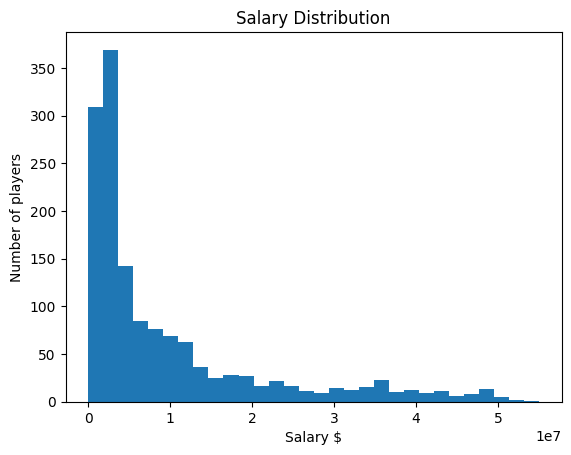

In [7]:
#Salary distribution
plt.hist(df.Salary, bins=30, range=(0, 55_000_000))
plt.xlabel("Salary $")
plt.ylabel("Number of players")
plt.title("Salary Distribution")

In [8]:
#Drop below the rookie salary players
df = df[df["Salary"] >= 1157153]

Text(0.5, 1.0, 'Salary Distribution')

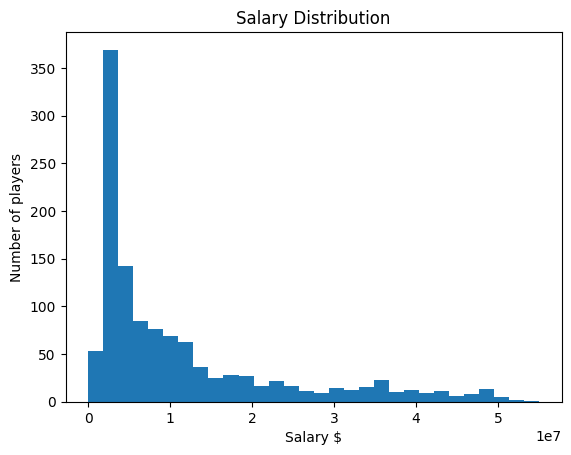

In [9]:
#Salary distribution
plt.hist(df.Salary, bins=30, range=(0, 55_000_000))
plt.xlabel("Salary $")
plt.ylabel("Number of players")
plt.title("Salary Distribution")

In [10]:
df.info()

<class 'pandas.DataFrame'>
Index: 1191 entries, 5849 to 7274
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  1191 non-null   str    
 1   Salary  1191 non-null   int64  
 2   Year    1191 non-null   int64  
 3   Pos     1191 non-null   str    
 4   Age     1191 non-null   int64  
 5   Team    1191 non-null   str    
 6   G       1191 non-null   int64  
 7   GS      1191 non-null   int64  
 8   MP      1191 non-null   float64
 9   FG      1191 non-null   float64
 10  FGA     1191 non-null   float64
 11  FG%     1191 non-null   float64
 12  3P      1191 non-null   float64
 13  3PA     1191 non-null   float64
 14  3P%     1191 non-null   float64
 15  2P      1191 non-null   float64
 16  2PA     1191 non-null   float64
 17  2P%     1191 non-null   float64
 18  eFG%    1191 non-null   float64
 19  FT      1191 non-null   float64
 20  FTA     1191 non-null   float64
 21  FT%     1191 non-null   float64
 22  ORB     1191 

<Axes: >

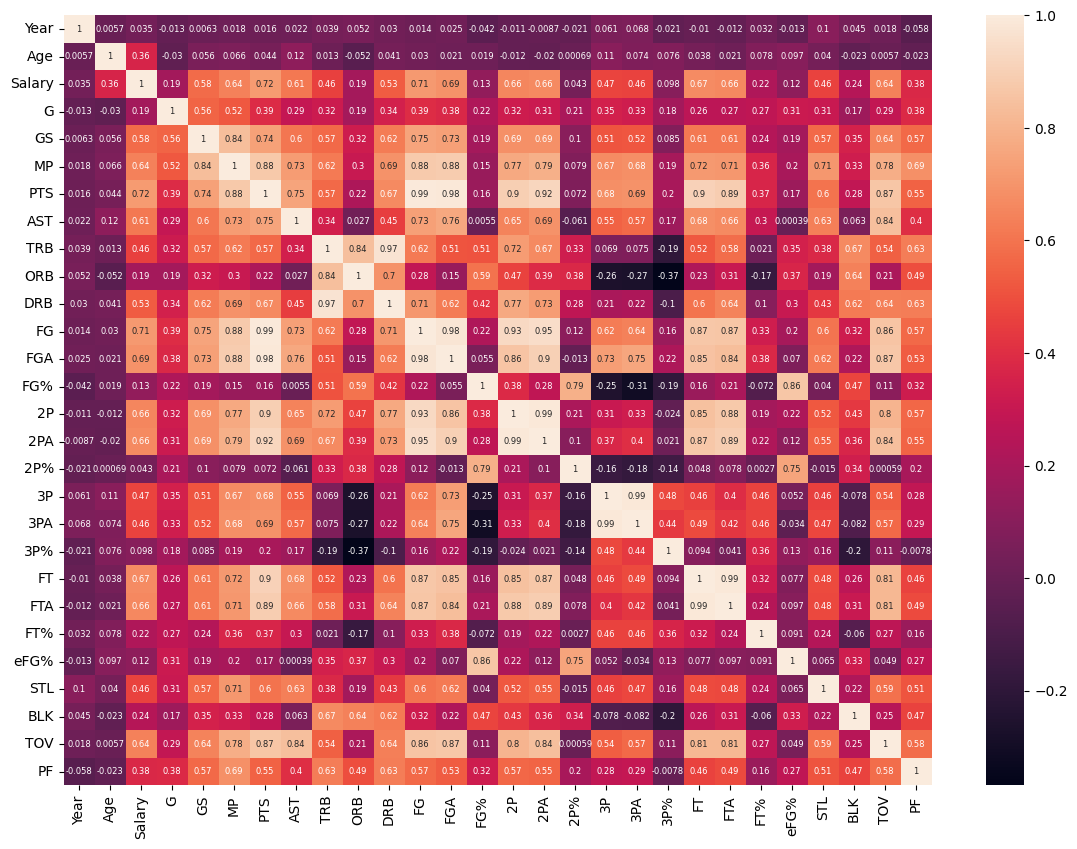

In [11]:
#Pearson correlation matrix
heat_salary= df[['Year', 'Age', 'Salary', 'G', 'GS', 'MP','PTS','AST','TRB','ORB', 'DRB',
'FG','FGA', 'FG%','2P','2PA','2P%','3P', '3PA', '3P%','FT', 'FTA','FT%','eFG%','STL','BLK','TOV','PF']]
plt.figure(figsize=(14, 10))
dfData = heat_salary.corr()
sns.heatmap(dfData, annot=True, annot_kws={"size":6})

In [12]:
playerdb = df[["Salary",'Age', 'G', 'GS', 'MP','PTS','AST','TRB','ORB', 'DRB',
'FG','FGA', 'FG%','2P','2PA','2P%','3P', '3PA', '3P%','FT', 'FTA','FT%','eFG%','STL','BLK','TOV','PF']]

X = playerdb.drop(columns=["Salary"])
y = playerdb["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=49
)


In [13]:
feature_sets = {
    "F1_important": ["PTS", "3PA", "DRB"],

    "F2_core": ["PTS", "MP", "TOV", "AST", "TRB", "STL", "BLK", "Age"],

    "F3_scoring": ["PTS", "3PA", "DRB", "STL", "MP", "FG"],

    "F4_all": [
        'Age', 'G', 'GS', 'MP', 'PTS', 'AST', 'TRB', 'ORB', 'DRB',
        'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%',
        'FT', 'FTA', 'FT%', 'eFG%', 'STL', 'BLK', 'TOV', 'PF'
    ]
}


In [14]:
linreg_results = []

cv = KFold(n_splits=5, shuffle=True, random_state=49)

for name, features in feature_sets.items():
    X_tr = X_train[features]
    linreg = LinearRegression()

    scores = cross_validate(
        linreg,
        X_tr,
        y_train,
        cv=cv,
        scoring={
            "rmse": "neg_root_mean_squared_error",
            "r2": "r2"
        }
    )

    linreg_results.append({
        "Model": "Linear Regression",
        "Feature_Set": name,
        "RMSE": -scores["test_rmse"].mean(),
        "R2": scores["test_r2"].mean()
    })



In [15]:
ranfor_results = []

for name, features in feature_sets.items():
    X_tr = X_train[features]

    rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=49,
        n_jobs=-1
    )

    scores = cross_validate(
        rf,
        X_tr,
        y_train,
        cv=cv,
        scoring={
            "rmse": "neg_root_mean_squared_error",
            "r2": "r2"
        }
    )

    ranfor_results.append({
        "Model": "Random Forest",
        "Feature_Set": name,
        "RMSE": -scores["test_rmse"].mean(),
        "R2": scores["test_r2"].mean()
    })

ranfor_results

[{'Model': 'Random Forest',
  'Feature_Set': 'F1_important',
  'RMSE': np.float64(8752335.068202568),
  'R2': np.float64(0.4796757551175661)},
 {'Model': 'Random Forest',
  'Feature_Set': 'F2_core',
  'RMSE': np.float64(6430518.963598682),
  'R2': np.float64(0.7221287812470895)},
 {'Model': 'Random Forest',
  'Feature_Set': 'F3_scoring',
  'RMSE': np.float64(8596308.319644738),
  'R2': np.float64(0.5024185227541278)},
 {'Model': 'Random Forest',
  'Feature_Set': 'F4_all',
  'RMSE': np.float64(6200264.348918025),
  'R2': np.float64(0.7421415110614864)}]

In [16]:
results_df = pd.DataFrame(linreg_results + ranfor_results)
results_df["RMSE_mil"] = results_df["RMSE"] / 1e6
results_df.sort_values(by="RMSE")
#Best feature subset is F4_all for both models


,Model,Feature_Set,RMSE,R2,RMSE_mil
7,Random Forest,F4_all,6.200264e+06,0.742142,6.200264
5,Random Forest,F2_core,6.430519e+06,0.722129,6.430519
3,Linear Regression,F4_all,7.342383e+06,0.635035,7.342383
1,Linear Regression,F2_core,7.434146e+06,0.626774,7.434146
0,Linear Regression,F1_important,8.398112e+06,0.524606,8.398112
2,Linear Regression,F3_scoring,8.426318e+06,0.520983,8.426318
6,Random Forest,F3_scoring,8.596308e+06,0.502419,8.596308
4,Random Forest,F1_important,8.752335e+06,0.479676,8.752335


In [17]:
wide_rmse = results_df.pivot(index="Feature_Set", columns="Model", values="RMSE_mil")
wide_r2   = results_df.pivot(index="Feature_Set", columns="Model", values="R2")
wide_rmse

Model,Linear Regression,Random Forest
Feature_Set,,
F1_important,8.398112,8.752335
F2_core,7.434146,6.430519
F3_scoring,8.426318,8.596308
F4_all,7.342383,6.200264


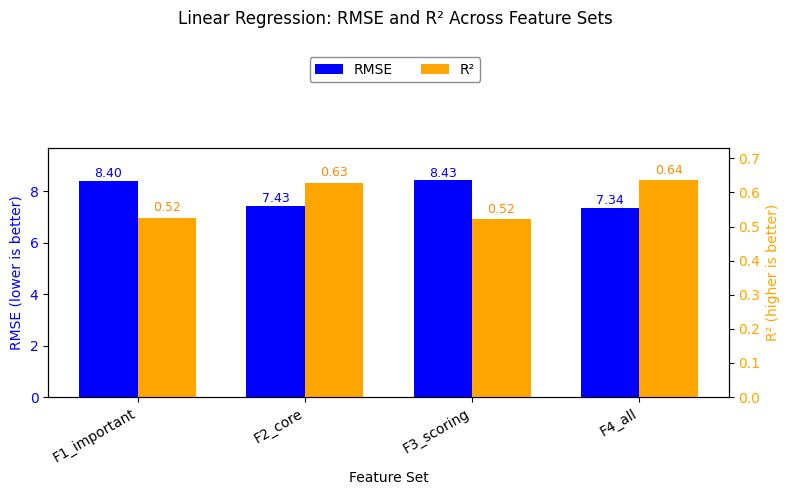

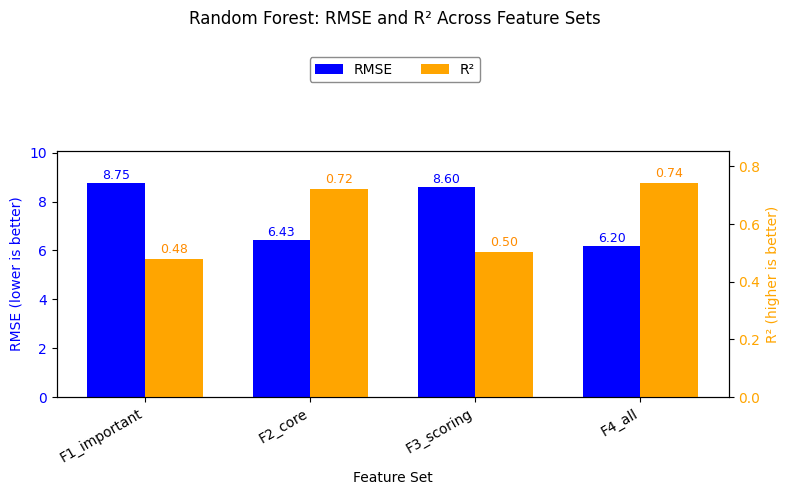

In [18]:

data = {
    "Model":   wide_rmse.index.tolist(),        # feature sets
    "LR_RMSE": wide_rmse["Linear Regression"].tolist(),        # change "LR" to actual column name
    "LR_R2":   wide_r2["Linear Regression"].tolist(),
    "RF_RMSE": wide_rmse["Random Forest"].tolist(),        # change "RF" to actual column name
    "RF_R2":   wide_r2["Random Forest"].tolist(),
}


ddf = pd.DataFrame(data)
x = np.arange(len(ddf["Model"]))
width = 0.35

def plot_model(title, rmse_values, r2_values):
    fig, ax1 = plt.subplots(figsize=(8,5))

    # RMSE bars
    bars1 = ax1.bar(x - width/2, rmse_values, width, color='blue', label='RMSE')
    ax1.set_ylabel("RMSE (lower is better)", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # R^2 bars
    ax2 = ax1.twinx()       #second y-axis, same x-axis
    bars2 = ax2.bar(x + width/2, r2_values, width, color='orange', label='R²')
    ax2.set_ylabel("R² (higher is better)", color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # X-axis labels
    ax1.set_xticks(x)
    ax1.set_xticklabels(ddf["Model"], rotation=30, ha='right')
    ax1.set_xlabel("Feature Set")

    # Add value labels
    for bar in bars1:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.15,
                 f"{bar.get_height():.2f}", ha='center', color='blue', fontsize=9)
    for bar in bars2:
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f"{bar.get_height():.2f}", ha='center', color='darkorange', fontsize=9)

    # Adjust Y-axis upper limits for padding
    ax1.set_ylim(0, max(rmse_values) * 1.15)
    ax2.set_ylim(0, max(r2_values) * 1.15)

    # Get legend handles/labels from both axes
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()

    # Title at the very top
    fig.suptitle(title, y=0.98)

    # Legend centered just under the title
    fig.legend(handles1 + handles2, labels1 + labels2,
               loc='upper center', bbox_to_anchor=(0.5, 0.90),
               ncol=2, frameon=True, framealpha=0.9, edgecolor='gray')

    # Leave room at the top for title + legend
    fig.tight_layout(rect=[0, 0, 1, 0.80])
    plt.show()

# Plot both charts
plot_model("Linear Regression: RMSE and R² Across Feature Sets", ddf["LR_RMSE"], ddf["LR_R2"])
plot_model("Random Forest: RMSE and R² Across Feature Sets", ddf["RF_RMSE"], ddf["RF_R2"])


In [19]:
best_features = feature_sets["F4_all"]
X_tr = X_train[best_features]
X_te = X_test[best_features]

rf = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=49,
        n_jobs=-1
    )

In [20]:

rf.fit(X_tr, y_train)
y_pred = rf.predict(X_te)

test_rmse = root_mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("FINAL TEST RMSE:", test_rmse)
print("FINAL TEST R2:", test_r2)

FINAL TEST RMSE: 5685640.858484306
FINAL TEST R2: 0.7392993303249291
